In [19]:
%%capture
from stravalib.client import Client
client = Client()
client.access_token = ""
athlete = client.get_athlete()
#print("For {id}, I now have an access token {token}".format(id=athlete.id, token=client.access_token))
#print("Current athlete: "+str(athlete))
#print("Activities: "+str(client.get_activities()))

In [ ]:
activities =client.get_activities()
sample = list(activities)[0]
sample.to_dict()

In [4]:
my_cols =['name',
          'average_speed',
          'average_heartrate',
          'average_watts', 
          'distance',
          'elapsed_time',
          'total_elevation_gain',
          'type', 
          'start_date_local']

In [10]:
%%capture
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])
    
import pandas as pd
df = pd.DataFrame(data, columns=my_cols)


## Start Time

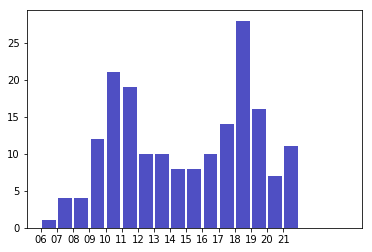

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
df["start_hour"] =  df["start_date_local"].apply(lambda x : datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").strftime("%H"))

plt.hist(x=df["start_hour"], bins= range(int(df["start_hour"].min()), int(df["start_hour"].max())), color='#0504aa', alpha=0.7, rwidth=0.85);